In [18]:
import numpy as np, sys,os
import pandas as pd
import matplotlib.pyplot as plt
import sys
from tqdm import tqdm
sys.path.insert(0, "..")
import src.utils.dtw as dtw
from src.visualization.visualize import plot_original_and_augmented


In [19]:
timeSeries = pd.read_json('../data/processed/realData.json', orient='records', lines=True)
healthy_df = timeSeries[timeSeries['class'] == 'Healthy'].cop_x
neuropathic_df = timeSeries[timeSeries['class'] == 'Neuropathic'].cop_x
diabetic_df = timeSeries[timeSeries['class'] == 'Diabetic'].cop_x

In [ ]:
def magnitude_warping(series, sigma=0.2, knot=4):
    """
    Apply magnitude warping to a time series.
    
    Args:
    - series: Original time series (1D array).
    - sigma: Standard deviation of the Gaussian noise.
    - knot: Number of knots for the piecewise linear interpolation.
    
    Returns:
    - warped_series: Magnitude warped time series.
    """
    # Generate random magnitudes
    orig_steps = np.linspace(0, 1, len(series))
    random_steps = np.linspace(0, 1, knot + 2)
    random_magnitudes = np.random.normal(loc=1.0, scale=sigma, size=knot + 2)

    # Interpolate random magnitudes to the original steps
    warped_magnitudes = np.interp(orig_steps, random_steps, random_magnitudes)

    # Apply magnitude warping
    warped_series = series * warped_magnitudes

    return warped_series

data = timeSeries.cop_x

augmented = magnitude_warping(data[0])



In [ ]:

from src.visualization.visualize import plot_series

def apply_magnitude_warping_to_column(column, sigma=0.2, knot=4):
    """
    Apply magnitude warping to each time series in a column.
    
    Args:
    - column: Pandas Series containing the time series (arrays).
    - sigma: Standard deviation of the Gaussian noise. Default is 0.2.
    - knot: Number of knots for the piecewise linear interpolation. Default is 4.
    
    Returns:
    - augmented_column: Pandas Series with the augmented time series.
    """
    augmented_column = column.apply(lambda series: magnitude_warping(series, sigma, knot))
    return augmented_column


In [39]:
healthy_df

0     [-0.5907142773, -0.5830138725, -0.568375171700...
1     [-0.1216296082, -0.1255443063, -0.1220796319, ...
2     [-0.1673141316, -0.1617796703, -0.1517826153, ...
3     [-0.0249518425, -0.0183494472, -0.0160548979, ...
4     [0.030813172200000002, 0.03789838, 0.046175301...
                            ...                        
82    [0.18205537330000002, 0.2093783294, 0.23914936...
83    [0.189697886, 0.17358714120000002, 0.157592403...
84    [0.18221712340000001, 0.2322544453, 0.27940068...
85    [0.6315287388, 0.6163761787, 0.6016702945, 0.5...
86    [0.6054148779, 0.586033519, 0.5712620934, 0.55...
Name: cop_x, Length: 87, dtype: object

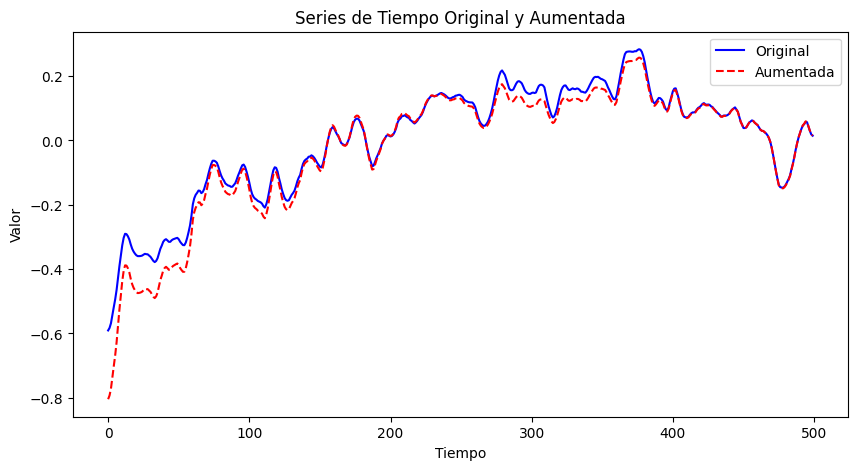

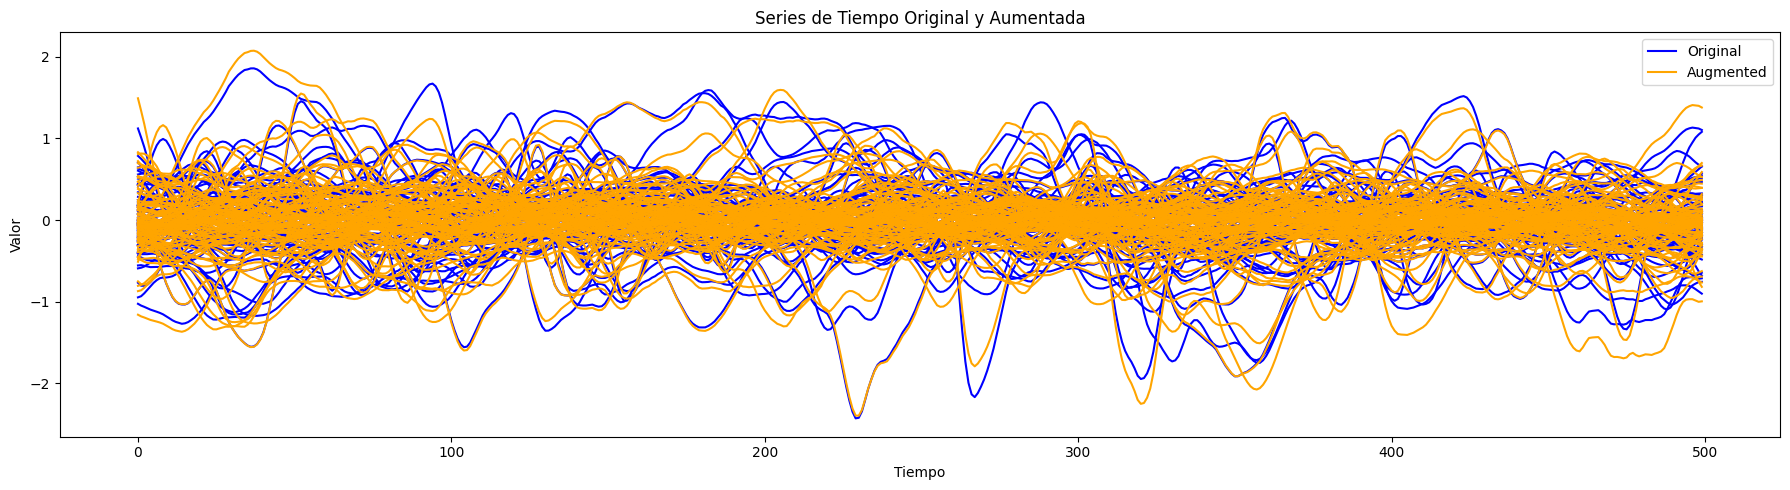

In [23]:
augmentedH = apply_magnitude_warping_to_column(healthy_df)

plot_original_and_augmented(healthy_df[0], augmentedH[0])
plot_series(healthy_df, augmentedH)

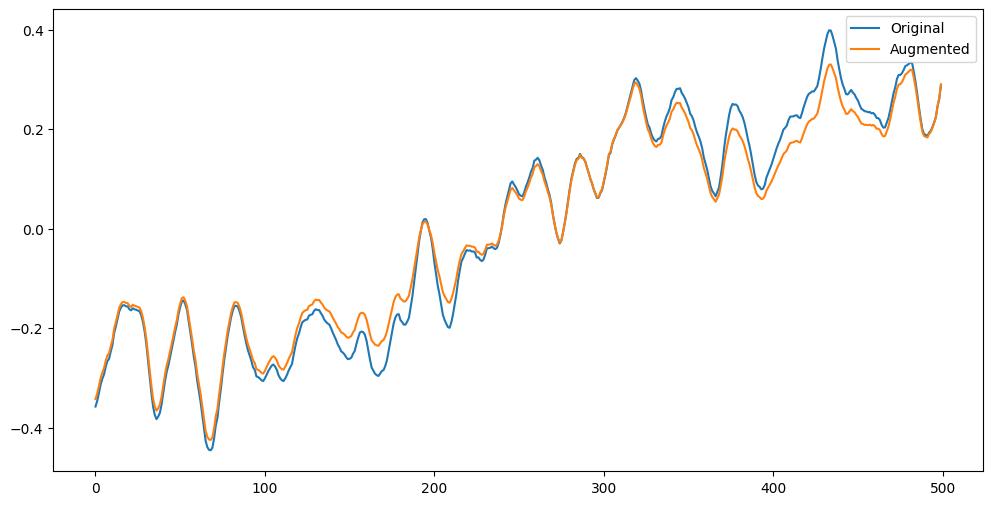

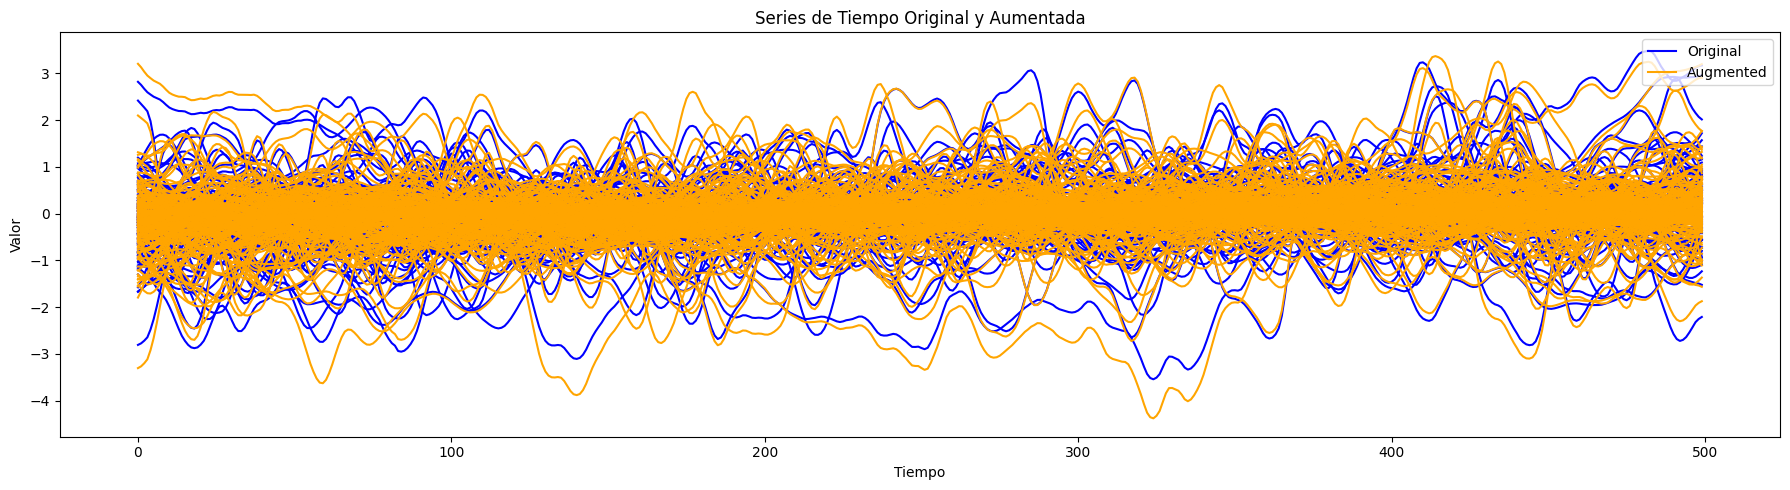

In [59]:
augmentedD = apply_magnitude_warping_to_column(diabetic_df)
plot_original_and_augmented(diabetic_df.iloc[0], augmentedD.iloc[0])
plot_series(diabetic_df.values, augmentedD.values)

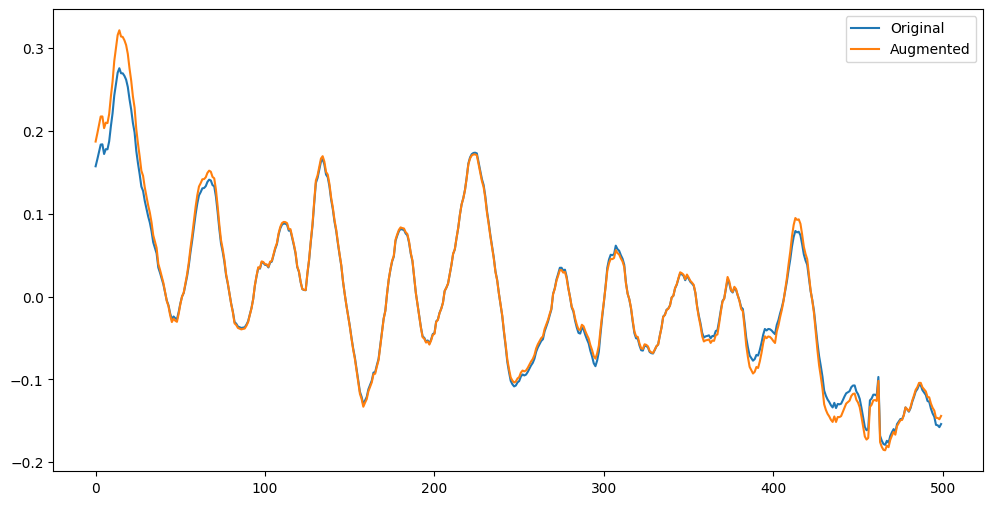

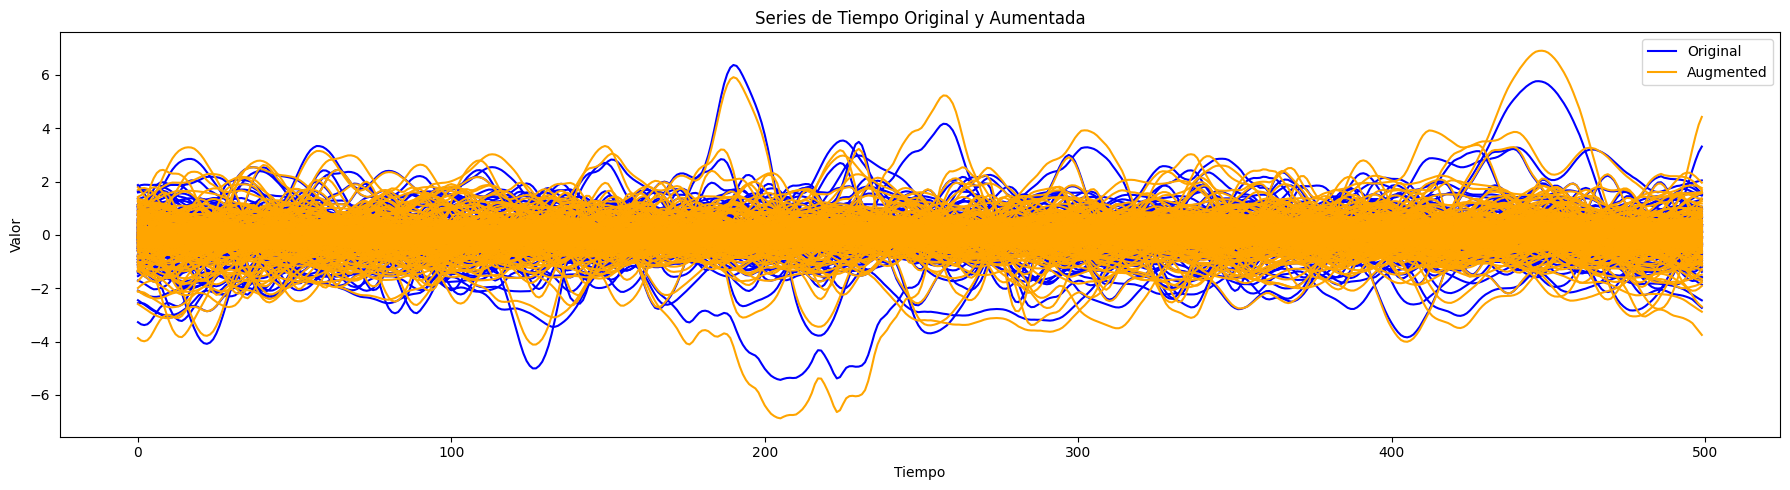

In [60]:
augmentedN = apply_magnitude_warping_to_column(neuropathic_df)
plot_original_and_augmented(neuropathic_df.iloc[0], augmentedN.iloc[0])
plot_series(neuropathic_df.values, augmentedN.values)

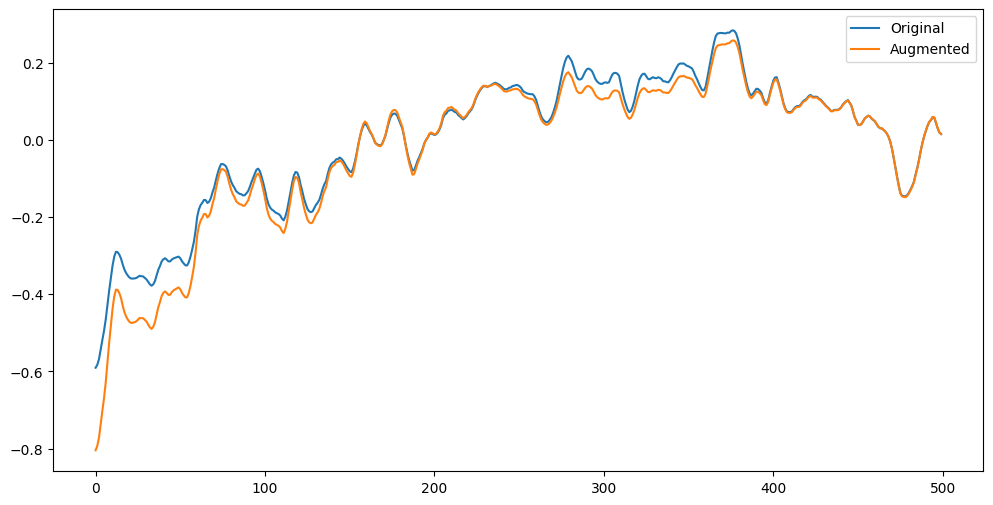

In [54]:
plot_original_and_augmented(healthy_df.iloc[0], augmentedH.iloc[0])
